In [1]:
# !pip install -U opencv-python

# ndarray(Homegenous, Sequence)

In [2]:
import numpy as np

In [3]:
aa = np.array([1,2,3])

In [4]:
'__getitem__' in dir(aa)

True

In [5]:
'__len__' in dir(aa)

True

### __getitem__, __len__ 이 있으면 인덱싱과 슬라이싱을 지원 

In [6]:
# python + numpy 5가지

### Resion of Interest(ROI)
- 인덱싱 : 한 부분
- 슬라이싱 : 여러 부분

In [7]:
from collections.abc import Sequence

In [8]:
import cv2

In [9]:
from PIL import Image

In [10]:
im_pil = Image.open('IU.jpg') # PIL 은 읽어서 고유 포멧으로 자동 변환, 읽을 수 있는 파일 한정적 예. 의학 데이터

In [11]:
type(im_pil)

PIL.JpegImagePlugin.JpegImageFile

In [12]:
import imageio

In [13]:
im_imageio = imageio.imread('IU.jpg')

In [14]:
type(im_imageio).__bases__ # 누구 상속?

(numpy.ndarray,)

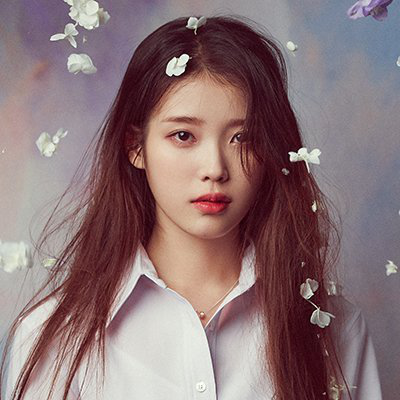

In [15]:
im_pil

In [16]:
im = cv2.imread('IU.jpg') #순서를 RGB 가 아니라 BGR 로 불러옴`

In [17]:
im

array([[[113, 101, 113],
        [110,  98, 110],
        [111,  99, 111],
        ...,
        [159, 135, 113],
        [159, 130, 109],
        [161, 132, 111]],

       [[106,  94, 106],
        [108,  96, 108],
        [113, 101, 113],
        ...,
        [153, 129, 107],
        [151, 124, 103],
        [160, 131, 110]],

       [[106,  92, 104],
        [111,  97, 109],
        [116, 102, 114],
        ...,
        [150, 125, 105],
        [145, 118,  98],
        [157, 130, 110]],

       ...,

       [[ 85,  76, 103],
        [153, 147, 166],
        [155, 151, 157],
        ...,
        [ 92,  85, 106],
        [ 91,  84, 105],
        [ 89,  82, 103]],

       [[ 74,  66,  96],
        [155, 150, 171],
        [159, 157, 163],
        ...,
        [ 91,  84, 105],
        [ 90,  83, 104],
        [ 87,  80, 101]],

       [[ 77,  69,  99],
        [159, 154, 175],
        [157, 154, 163],
        ...,
        [ 88,  81, 102],
        [ 90,  83, 104],
        [ 92,  85, 106]]

In [18]:
[(i, getattr(cv2, i)) for i in dir(cv2) if 'IMREAD' in i]

[('IMREAD_ANYCOLOR', 4),
 ('IMREAD_ANYDEPTH', 2),
 ('IMREAD_COLOR', 1),
 ('IMREAD_GRAYSCALE', 0),
 ('IMREAD_IGNORE_ORIENTATION', 128),
 ('IMREAD_LOAD_GDAL', 8),
 ('IMREAD_REDUCED_COLOR_2', 17),
 ('IMREAD_REDUCED_COLOR_4', 33),
 ('IMREAD_REDUCED_COLOR_8', 65),
 ('IMREAD_REDUCED_GRAYSCALE_2', 16),
 ('IMREAD_REDUCED_GRAYSCALE_4', 32),
 ('IMREAD_REDUCED_GRAYSCALE_8', 64),
 ('IMREAD_UNCHANGED', -1)]

In [19]:
for i in dir(cv2):
    if 'IMREAD' in i:
        print(i)

IMREAD_ANYCOLOR
IMREAD_ANYDEPTH
IMREAD_COLOR
IMREAD_GRAYSCALE
IMREAD_IGNORE_ORIENTATION
IMREAD_LOAD_GDAL
IMREAD_REDUCED_COLOR_2
IMREAD_REDUCED_COLOR_4
IMREAD_REDUCED_COLOR_8
IMREAD_REDUCED_GRAYSCALE_2
IMREAD_REDUCED_GRAYSCALE_4
IMREAD_REDUCED_GRAYSCALE_8
IMREAD_UNCHANGED


In [20]:
# im = cv2.imread('IU.jpg', cv2.IMREAD_GRAYSCALE) # C 언어 형태의 파라메터
im = cv2.imread('IU.jpg')

In [21]:
im.shape

(400, 400, 3)

In [22]:
im

array([[[113, 101, 113],
        [110,  98, 110],
        [111,  99, 111],
        ...,
        [159, 135, 113],
        [159, 130, 109],
        [161, 132, 111]],

       [[106,  94, 106],
        [108,  96, 108],
        [113, 101, 113],
        ...,
        [153, 129, 107],
        [151, 124, 103],
        [160, 131, 110]],

       [[106,  92, 104],
        [111,  97, 109],
        [116, 102, 114],
        ...,
        [150, 125, 105],
        [145, 118,  98],
        [157, 130, 110]],

       ...,

       [[ 85,  76, 103],
        [153, 147, 166],
        [155, 151, 157],
        ...,
        [ 92,  85, 106],
        [ 91,  84, 105],
        [ 89,  82, 103]],

       [[ 74,  66,  96],
        [155, 150, 171],
        [159, 157, 163],
        ...,
        [ 91,  84, 105],
        [ 90,  83, 104],
        [ 87,  80, 101]],

       [[ 77,  69,  99],
        [159, 154, 175],
        [157, 154, 163],
        ...,
        [ 88,  81, 102],
        [ 90,  83, 104],
        [ 92,  85, 106]]

In [23]:
import matplotlib.pyplot as plt

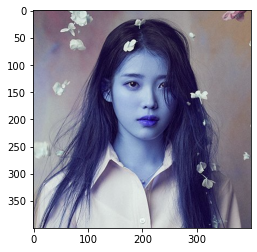

In [24]:
plt.imshow(im) # 3차원 컬러 이미지를 RGB 로 보여줌 그래서 BGR 형태이면 화면 색 이상하게 나옴

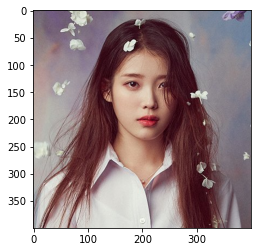

In [25]:
plt.imshow(im[...,::-1])

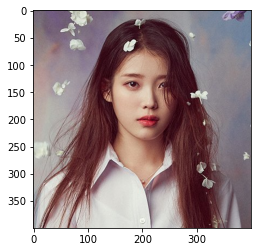

In [26]:
plt.imshow(im[...,::-1])

In [27]:
# ROI
im_face = im[0:150, 100:250, ::-1]

In [28]:
cv2.imwrite('me_face_1.jpg', im_face)

True

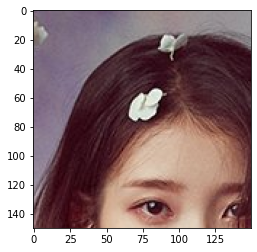

In [29]:
plt.imshow(im_face)

In [30]:
b,g,r = cv2.split(im)

In [31]:
im2 = cv2.merge((r,g,b)) # BGR 을 RGB

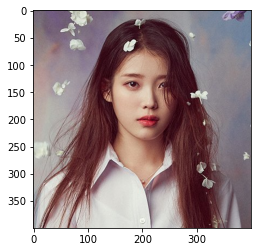

In [32]:
plt.imshow(im2)

In [33]:
im_pil = Image.open('IU.jpg')

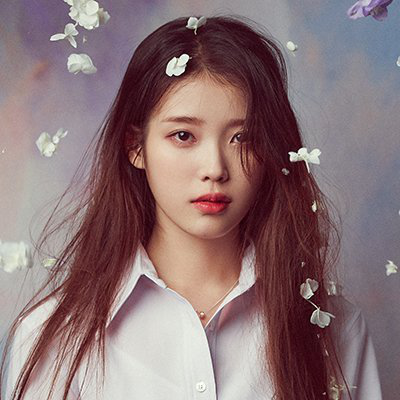

In [34]:
im_pil

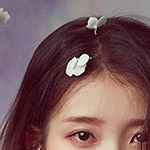

In [35]:
im_pil.crop((100,0,250,150))